#Actitvity tracker using apple / fitbit data
- Predicting the activity 


In [ ]:
# Data Collection, Data Cleaning & Data Manipulation 
import numpy as np 
import pandas as pd 
from sklearn import datasets 

# Data Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(font_scale = 1)
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [ ]:
data = pd.read_csv('/content/aw_fb_data.csv')
data.head()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


In [ ]:
data.shape

(6264, 20)

In [ ]:
# copy the dataframe
data1=data

In [ ]:
# check the columns
data1.columns


Index(['Unnamed: 0', 'X1', 'age', 'gender', 'height', 'weight', 'steps',
       'hear_rate', 'calories', 'distance', 'entropy_heart', 'entropy_setps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance', 'device', 'activity'],
      dtype='object')

In [ ]:
df= data1.drop(['device','Unnamed: 0','X1', 'age', 'gender','entropy_heart', 'entropy_setps',
        'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance','hear_rate'], axis=1)

In [ ]:
df

,height,weight,steps,calories,distance,resting_heart,activity
0,168.0,65.4,10.771429,0.344533,0.008327,59.0,Lying
1,168.0,65.4,11.475325,3.287625,0.008896,59.0,Lying
2,168.0,65.4,12.179221,9.484000,0.009466,59.0,Lying
3,168.0,65.4,12.883117,10.154556,0.010035,59.0,Lying
4,168.0,65.4,13.587013,10.825111,0.010605,59.0,Lying
...,...,...,...,...,...,...,...
6259,157.5,71.4,1.000000,20.500000,1.000000,35.0,Running 7 METs
6260,157.5,71.4,1.000000,20.500000,1.000000,35.0,Running 7 METs
6261,157.5,71.4,1.000000,20.500000,1.000000,35.0,Running 7 METs
6262,157.5,71.4,1.000000,20.500000,1.000000,35.0,Running 7 METs


In [ ]:
df.corr()

,height,weight,steps,calories,distance,resting_heart
height,1.000000,0.693504,0.025729,0.034447,-0.091422,-0.028330
weight,0.693504,1.000000,0.045389,-0.023612,-0.072294,-0.014345
steps,0.025729,0.045389,1.000000,-0.250973,-0.090433,0.083964
calories,0.034447,-0.023612,-0.250973,1.000000,0.255145,-0.055703
distance,-0.091422,-0.072294,-0.090433,0.255145,1.000000,-0.320791
resting_heart,-0.028330,-0.014345,0.083964,-0.055703,-0.320791,1.000000


In [ ]:
df['activity'].unique()

array(['Lying', 'Sitting', 'Self Pace walk', 'Running 3 METs',
       'Running 5 METs', 'Running 7 METs'], dtype=object)

--> there are 6 classes of activities
  i.e : 'Lying', 'Sitting', 'Self Pace walk', 'Running 3 METs','Running 5 METs', 'Running 7 METs'

In [ ]:
label_encode=LabelEncoder()
label_encode

LabelEncoder()

In [ ]:
# applying the label encoder on the activity column
le1=label_encode.fit(df['activity'])
ac_data1=le1.transform(df['activity'])

In [ ]:
ac_data1

array([0, 0, 0, ..., 3, 3, 3])

In [ ]:
le_name_mapping = dict(zip(le1.classes_, le1.transform(le1.classes_)))
print(le_name_mapping)

{'Lying': 0, 'Running 3 METs': 1, 'Running 5 METs': 2, 'Running 7 METs': 3, 'Self Pace walk': 4, 'Sitting': 5}


In [ ]:
le1.classes_[5]


'Sitting'

In [ ]:
print(df['activity'].unique())
df['activity']=ac_data1
print(df['activity'].unique())

[0 5 4 1 2 3]
[0 5 4 1 2 3]


In [ ]:
df.corr()['activity']

height          -0.006379
weight           0.000687
steps            0.039420
calories         0.044977
distance         0.023214
resting_heart   -0.015237
activity         1.000000
Name: activity, dtype: float64

In [ ]:
target = df['activity'] 
feature=df.drop(columns = 'activity')
print(target)

0       0
1       0
2       0
3       0
4       0
       ..
6259    3
6260    3
6261    3
6262    3
6263    3
Name: activity, Length: 6264, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, random_state = 42)

In [ ]:
data.isnull().sum() # take summation of null values

Unnamed: 0              0
X1                      0
age                     0
gender                  0
height                  0
weight                  0
steps                   0
hear_rate               0
calories                0
distance                0
entropy_heart           0
entropy_setps           0
resting_heart           0
corr_heart_steps        0
norm_heart              0
intensity_karvonen      0
sd_norm_heart           0
steps_times_distance    0
device                  0
activity                0
dtype: int64

--> there are no null values in the columns


In [ ]:
data.describe() 

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance
count,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000
mean,3132.500000,1771.144317,29.158525,0.476533,169.709052,69.614464,109.562268,86.142331,19.471823,13.832555,6.030314,5.739984,65.869938,0.306447,20.272393,0.155479,8.110854,590.035239
std,1808.405375,1097.988748,8.908978,0.499489,10.324698,13.451878,222.797908,28.648385,27.309765,45.941437,0.765574,1.256348,21.203017,0.775418,28.388116,0.210927,12.535080,4063.838530
min,1.000000,1.000000,18.000000,0.000000,143.000000,43.000000,1.000000,2.222222,0.056269,0.000440,0.000000,0.000000,3.000000,-1.000000,-76.000000,-2.714286,0.000000,0.000690
25%,1566.750000,789.750000,23.000000,0.000000,160.000000,60.000000,5.159534,75.598079,0.735875,0.019135,6.108524,5.909440,58.134333,-0.467303,1.148883,0.009819,0.264722,0.659260
50%,3132.500000,1720.000000,28.000000,0.000000,168.000000,68.000000,10.092029,77.267680,4.000000,0.181719,6.189825,6.157197,75.000000,0.665829,9.820254,0.079529,2.893503,13.368619
75%,4698.250000,2759.250000,33.000000,1.000000,180.000000,77.300000,105.847222,95.669118,20.500000,15.697188,6.247928,6.247928,76.138701,1.000000,27.077336,0.211868,9.679672,93.728562
max,6264.000000,3670.000000,56.000000,1.000000,191.000000,115.000000,1714.000000,194.333333,97.500000,335.000000,6.475733,6.475733,155.000000,1.000000,156.319444,1.297980,74.457929,51520.000000


In [ ]:
# sns.countplot(data['gender'])
data['gender'].value_counts()

0    3279
1    2985
Name: gender, dtype: int64

<Axes: ylabel='activity'>

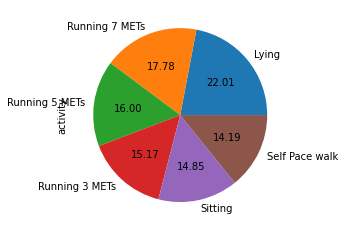

In [ ]:
data['activity'].value_counts().plot(kind='pie',autopct='%.2f')

(array([1050., 1749.,  783., 1255.,  559.,  309.,    0.,  169.,   94.,
         296.]),
 array([18. , 21.8, 25.6, 29.4, 33.2, 37. , 40.8, 44.6, 48.4, 52.2, 56. ]),
 <BarContainer object of 10 artists>)

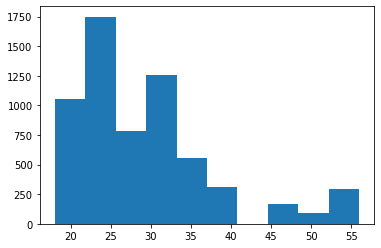

In [ ]:
plt.hist(data['age'],bins=10)

<ipython-input-37-67f5a22b11e7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


<Axes: xlabel='age', ylabel='Density'>

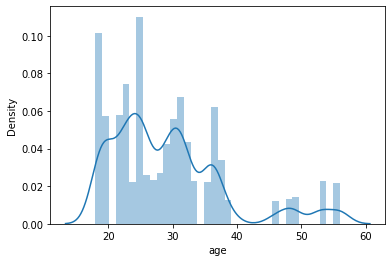

In [ ]:
sns.distplot(data['age'])

#label encoding of target values

In [ ]:
le=label_encode.fit(data['activity'])
ac_data=le.transform(data['activity'])

In [ ]:
print(data['activity'].unique())
data['activity']=ac_data
print(data['activity'].unique())

['Lying' 'Sitting' 'Self Pace walk' 'Running 3 METs' 'Running 5 METs'
 'Running 7 METs']
[0 5 4 1 2 3]


In [ ]:
target1 = df['activity'] 
feature1=df.drop(columns = 'activity')
print(target)

0       0
1       0
2       0
3       0
4       0
       ..
6259    3
6260    3
6261    3
6262    3
6263    3
Name: activity, Length: 6264, dtype: int64


In [ ]:
data.sample()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
4764,4765,1121,27,1,176.0,81.8,2.267313,140.443073,14.5,2.932133,6.266787,6.266787,79.278743,-1.0,61.16433,0.537844,2.893503,6.648063,fitbit,3


In [ ]:
df1= data.drop(['device'], axis=1)

In [ ]:
df1.dtypes

Unnamed: 0                int64
X1                        int64
age                       int64
gender                    int64
height                  float64
weight                  float64
steps                   float64
hear_rate               float64
calories                float64
distance                float64
entropy_heart           float64
entropy_setps           float64
resting_heart           float64
corr_heart_steps        float64
norm_heart              float64
intensity_karvonen      float64
sd_norm_heart           float64
steps_times_distance    float64
activity                  int64
dtype: object

Text(0.5, 1.0, 'Heatmap of Health Care Data Correlation')

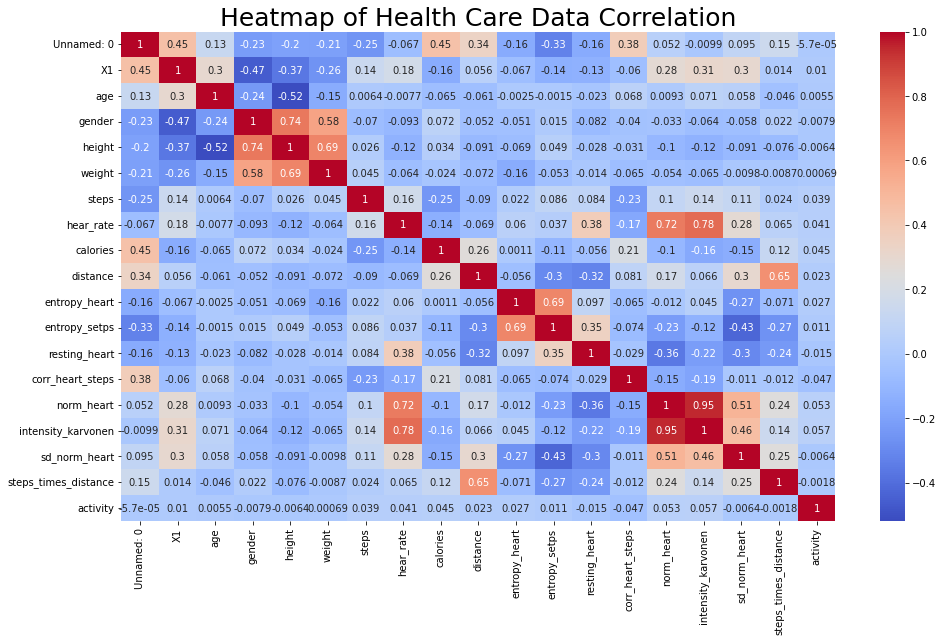

In [ ]:
# Heatmap
plt.figure(figsize=(16,9)) # heatmap size in ratio 16:9

sns.heatmap(df1.corr(), annot = True, cmap ='coolwarm') # show heatmap

plt.title("Heatmap of Health Care Data Correlation", fontsize = 25) # title of heatmap *****code 5

Train-Test-Split

In [ ]:
target1 = df1['activity'] 
feature1=df1.drop(columns = 'activity')
print(target1)

0       0
1       0
2       0
3       0
4       0
       ..
6259    3
6260    3
6261    3
6262    3
6263    3
Name: activity, Length: 6264, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(feature, target, test_size = 0.2, random_state = 0)

In [ ]:
X_train1

,height,weight,steps,calories,distance,resting_heart
2369,163.0,61.0,117.000000,0.753500,0.051710,78.531302
4778,160.0,75.0,1.000000,1.000000,1.000000,6.125000
4132,180.0,79.3,4.568421,68.000000,15.751579,75.668850
3101,152.0,48.6,5.826087,0.250667,0.004776,60.846154
3082,152.0,48.6,5.600000,0.252000,0.003566,60.846154
...,...,...,...,...,...,...
4931,157.5,53.6,4.226835,89.000000,15.755374,75.672837
3264,158.0,59.1,6.833333,0.246000,0.006145,84.200000
1653,173.0,85.7,520.545455,20.033067,0.352624,71.000000
2607,168.0,56.0,10.771429,0.344533,0.008327,72.000000


In [ ]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of y_test = ', y_test.shape)


Shape of X_train =  (5011, 6)
Shape of X_test =  (1253, 6)
Shape of y_train =  (5011,)
Shape of y_test =  (1253,)


In [ ]:
a=X_test.iloc[:1,:]
arr = a.to_numpy()
arr

array([[1.84000000e+02, 7.73000000e+01, 2.24385714e+02, 1.72000000e-01,
        2.28568571e-01, 7.61387008e+01]])

Scaling the values


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
X_test_sc

array([[ 1.39149821,  0.5734763 ,  0.51479521, -0.70430953, -0.29762687,
         0.48095771],
       [-1.17327212,  0.13422674,  0.04180606, -0.68314533, -0.30153097,
         0.63587959],
       [ 1.29471442, -0.290133  , -0.47291633,  2.15242241,  0.03643096,
         0.45865804],
       ...,
       [-0.93131265,  0.46924759, -0.41449136, -0.70117476, -0.30222408,
         0.00253504],
       [-1.02809644, -1.08673813,  0.25275012, -0.68381577, -0.30091248,
         0.69249164],
       [ 1.10114685,  1.90611479, -0.44843539, -0.67430276,  0.03512694,
         0.45869974]])

Decision tree classifier


In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion= 'entropy', random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [ ]:
  # accuracy_score(y_test, y_pred_dt)

NameError: ignored

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

accuracy_score(y_test, y_pred_xgb)

0.767757382282522

In [ ]:
# Pickle
import pickle

# save model
pickle.dump(xgb_model , open('Health_Care_Model1.pickle', 'wb'))

# load model
ml_model_pl = pickle.load(open('Health_Care_Model1.pickle', 'rb'))

# predict the output
y_pred_pl = ml_model_pl.predict(X_test)

# confusion matrix
# cm_pl = confusion_matrix(y_test, y_pred_pl)
# print('Confussion matrix = \n', cm_pl)

# show the accuracy
print("Accuracy of model = ",accuracy_score(y_test, y_pred_pl))

Accuracy of model =  0.767757382282522


In [ ]:
X_test.head(1)

,height,weight,steps,calories,distance,resting_heart
2304,184.0,77.3,224.385714,0.172,0.228569,76.138701


In [ ]:
X_test

,height,weight,steps,calories,distance,resting_heart
2304,184.0,77.3,224.385714,0.172000,0.228569,76.138701
3621,157.5,71.4,119.000000,0.756000,0.047120,79.421795
4671,183.0,65.7,4.315789,79.000000,15.754386,75.666128
2707,168.0,62.0,609.200000,20.752091,0.425868,56.200000
2596,168.0,68.0,6.416667,0.246500,0.005880,64.866667
...,...,...,...,...,...,...
1611,191.0,105.7,441.250000,0.839500,0.412260,66.000000
6009,163.7,60.5,4.568421,1.000000,15.751579,75.668850
952,160.0,75.9,17.333333,0.258500,0.014907,66.000000
3573,159.0,55.0,166.000000,0.737500,0.075865,80.621513


In [ ]:
x=np.array([[168.0,65.4,10.771429,0.344533,0.008327,59.0]])

In [ ]:
pred=ml_model_pl.predict(x)

In [ ]:
le1.classes_

array(['Lying', 'Running 3 METs', 'Running 5 METs', 'Running 7 METs',
       'Self Pace walk', 'Sitting'], dtype=object)

In [ ]:
class_names[pred]

array(['Lying'], dtype=object)

In [ ]:
def predict_activity(height,weight,steps,calories,distance,resting_rate):
  arr=np.array([[height,weight,steps,calories,distance,resting_rate]])
  # load model
  ml_model_pl = pickle.load(open('Health_Care_Model1.pickle', 'rb'))
  pred=ml_model_pl.predict(arr)
  class_names=['Lying', 'Running 3 METs', 'Running 5 METs', 'Running 7 METs',
       'Self Pace walk', 'Sitting']
  return class_names[int(pred)]

In [ ]:
pred_class=predict_activity(168.0,65.4,10.771429,0.344533,0.008327,59.0)
pred_class

'Lying'